In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy


In [14]:
# underdamping

# define the y' funciotn

def f(t, y0, K = 1, M = 1, gamma = 0.2): # gamma = lambda / 2m 
    F = -2 * M * gamma * y0[1] - K * y0[0]
    a = F / M
    return np.array([y0[1], a])

# Prepare the input arguments
t_span = [0, 20]
t_eval = np.linspace(0, 20, 20001, endpoint=True)
K = 1
M = 1
omega_0 = 1
gamma = 0.2
omega = np.sqrt(np.abs(omega_0 ** 2 - gamma ** 2))

args = (K, M)
y0 = np.array([0, omega])

# use the IVP solver
# sol_euler = mysolver.solve_ivp(f, t_span, y0, method='Euler', t_eval=t_eval, args=args)
# sol_rk2 = mysolver.solve_ivp(f, t_span, y0, method='RK2', t_eval=t_eval, args=args)
sol_rk4 = mysolver.solve_ivp(f, t_span, y0, method='RK4', t_eval=t_eval, args=args)

# analytical solution
x = np.zeros(len(t_eval))
v = np.zeros(len(t_eval))

A = 1
phi = -np.pi / 2
x[0] = y0[0]
v[0] = y0[1]

sol_analytical = np.zeros((2, len(t_eval)))
sol_analytical[0, 0] = y0[0]
sol_analytical[1, 0] = y0[1]

for i in range(1, len(t_eval)):
    x[i] = A * np.exp(-gamma * t_eval[i]) * np.cos(omega * t_eval[i] + phi)
    v[i] = -A * np.exp(-gamma * t_eval[i]) * (gamma * np.cos(omega * t_eval[i] + phi) + omega * np.sin(omega * t_eval[i] + phi))
    sol_analytical[0, i] = x[i]
    sol_analytical[1, i] = v[i]

In [6]:
# overdamping

# define the y' funciotn

def f(t, y0, K = 1, M = 1, gamma = 1.2): # gamma = lambda / 2m 
    F = -2 * M * gamma * y0[1] - K * y0[0]
    a = F / M
    return np.array([y0[1], a])

# Prepare the input arguments
t_span = [0, 20]
t_eval = np.linspace(0, 20, 20001, endpoint=True)
K = 1
M = 1
omega_0 = 1
gamma = 1.2
omega = np.sqrt(np.abs(omega_0 ** 2 - gamma ** 2))

args = (K, M)
y0 = np.array([0, omega])

# use the IVP solver
# sol_euler = mysolver.solve_ivp(f, t_span, y0, method='Euler', t_eval=t_eval, args=args)
# sol_rk2 = mysolver.solve_ivp(f, t_span, y0, method='RK2', t_eval=t_eval, args=args)
sol_rk4 = mysolver.solve_ivp(f, t_span, y0, method='RK4', t_eval=t_eval, args=args)

# analytical solution
x = np.zeros(len(t_eval))
v = np.zeros(len(t_eval))

A = 1
phi = -np.pi / 2
x[0] = y0[0]
v[0] = y0[1]

sol_analytical = np.zeros((2, len(t_eval)))
sol_analytical[0, 0] = y0[0]
sol_analytical[1, 0] = y0[1]

for i in range(1, len(t_eval)):
    x[i] = A * np.exp(-gamma * t_eval[i]) * np.sinh(omega * t_eval[i])
    v[i] = -A * np.exp(-gamma * t_eval[i]) * (gamma * np.sinh(omega * t_eval[i]) - omega * np.cosh(omega * t_eval[i]))
    sol_analytical[0, i] = x[i]
    sol_analytical[1, i] = v[i]

In [9]:
# critical damping

# define the y' funciotn

def f(t, y0, K = 1, M = 1, gamma = 1): # gamma = lambda / 2m 
    F = -2 * M * gamma * y0[1] - K * y0[0]
    a = F / M
    return np.array([y0[1], a])

# Prepare the input arguments
t_span = [0, 20]
t_eval = np.linspace(0, 20, 20001, endpoint=True)
K = 1
M = 1
omega_0 = 1
gamma = 1
omega = 0

args = (K, M)
y0 = np.array([0, omega])

# use the IVP solver
# sol_euler = mysolver.solve_ivp(f, t_span, y0, method='Euler', t_eval=t_eval, args=args)
# sol_rk2 = mysolver.solve_ivp(f, t_span, y0, method='RK2', t_eval=t_eval, args=args)
sol_rk4 = mysolver.solve_ivp(f, t_span, y0, method='RK4', t_eval=t_eval, args=args)

# analytical solution
x = np.zeros(len(t_eval))
v = np.zeros(len(t_eval))

A = 1
phi = -np.pi / 2
x[0] = y0[0]
v[0] = y0[1]

sol_analytical = np.zeros((2, len(t_eval)))
sol_analytical[0, 0] = y0[0]
sol_analytical[1, 0] = y0[1]

for i in range(1, len(t_eval)):
    x[i] = 0
    v[i] = 0
    sol_analytical[0, i] = x[i]
    sol_analytical[1, i] = v[i]

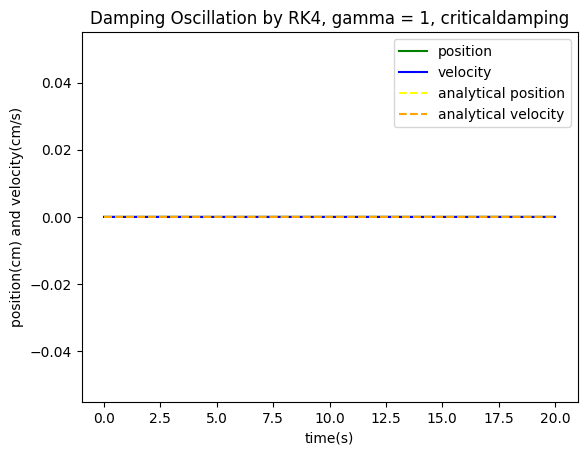

In [10]:
# visualize the results
# plt.plot(t_eval, sol_euler[0], label='Euler position', color='red')
# plt.plot(t_eval, sol_euler[1], label='Euler velocity', color='blue)
# plt.plot(t_eval, sol_rk2[0], label='RK2 position', color='red')
# plt.plot(t_eval, sol_rk2[1], label='RK2 velocity', color='blue')
plt.plot(t_eval, sol_rk4[0], label='position', color='green')
plt.plot(t_eval, sol_rk4[1], label='velocity', color='blue')
plt.plot(t_eval, sol_analytical[0], label='analytical position', color='yellow', linestyle='--')
plt.plot(t_eval, sol_analytical[1], label='analytical velocity', color='orange', linestyle='--')
plt.xlabel('time(s)')
plt.ylabel('position(cm) and velocity(cm/s)')
plt.legend()
plt.title(f'Damping Oscillation by RK4, gamma = {gamma}, criticaldamping')
# plt.savefig('damping_oscillation_criticaldamping.png')
plt.show()

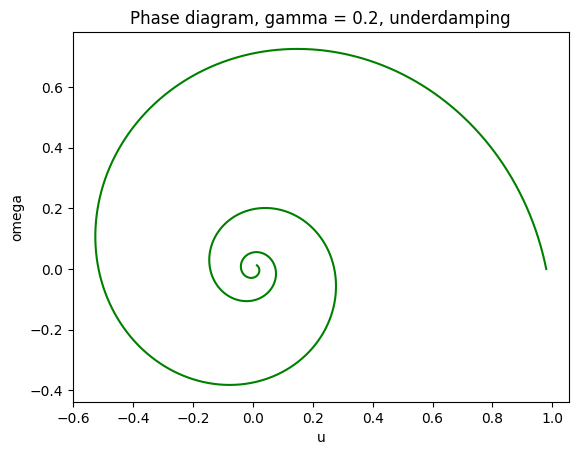

In [5]:
# phase diagram for underdamping

u = np.zeros(len(t_eval))
omega_2 = np.zeros(len(t_eval)) # just for distinguish two omega

u = omega * sol_rk4[0, :]
omega_2 = gamma * sol_rk4[0, :] + K * sol_rk4[1, :]

plt.plot(omega_2, u , color='green')
plt.xlabel('u')
plt.ylabel('omega')
plt.title(f'Phase diagram, gamma = {gamma}, underdamping')
# plt.savefig('phase_diagram_underdamping.png')
plt.show()

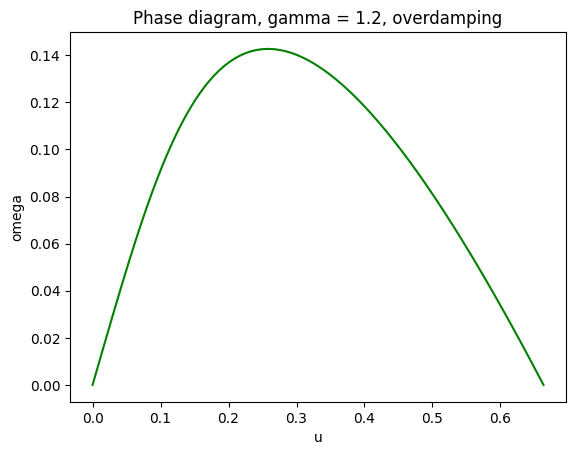

In [8]:
# phase diagram for overdamping

u = np.zeros(len(t_eval))
omega_2 = np.zeros(len(t_eval))

u = omega * sol_rk4[0, :]
omega_2 = gamma * sol_rk4[0, :] + K * sol_rk4[1, :]

plt.plot(omega_2, u , color='green')
plt.xlabel('u')
plt.ylabel('omega')
plt.title(f'Phase diagram, gamma = {gamma}, overdamping')
# plt.savefig('phase_diagram_overdamping.png')
plt.show()

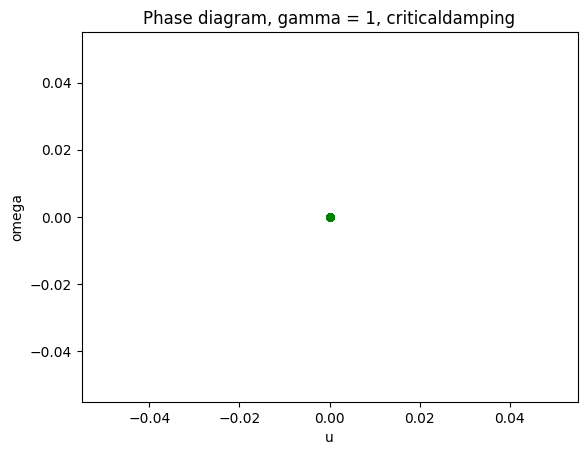

In [13]:
# phase diagram for critical damping

u = np.zeros(len(t_eval))
omega_2 = np.zeros(len(t_eval))

u = omega * sol_rk4[0, :]
omega_2 = gamma * sol_rk4[0, :] + K * sol_rk4[1, :]

plt.plot(omega_2, u , color='green', marker='o', markersize=5)
plt.xlabel('u')
plt.ylabel('omega')
plt.title(f'Phase diagram, gamma = {gamma}, criticaldamping')
# plt.savefig('phase_diagram_criticaldamping.png')
plt.show()

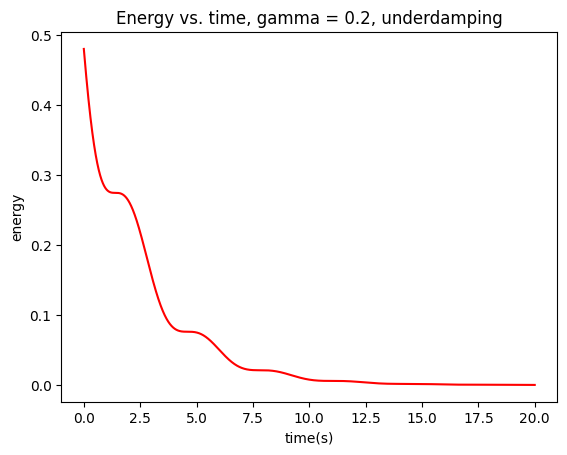

In [17]:
# plot energy

energy = np.zeros(len(t_eval))
energy = 0.5 * M * sol_rk4[1] ** 2 + 0.5 * K * sol_rk4[0] ** 2

plt.plot(t_eval, energy, label='energy', color='red')
plt.xlabel('time(s)')
plt.ylabel('energy')
plt.title(f'Energy vs. time, gamma = {gamma}, underdamping')
plt.savefig('energy_vs_time_underdamping.png')
plt.show()


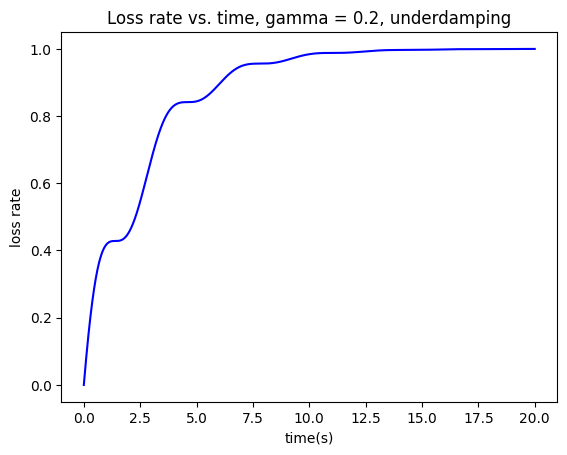

In [19]:
# plot loss rate

loss_rate = np.zeros(len(t_eval))
for i in range(1, len(t_eval)):
    loss_rate[i] = -(energy[i] - energy[0]) / energy[0]

plt.plot(t_eval, loss_rate, label='loss rate', color='blue')
plt.xlabel('time(s)')
plt.ylabel('loss rate')
plt.title(f'Loss rate vs. time, gamma = {gamma}, underdamping')
plt.savefig('loss_rate_vs_time_underdamping.png')
plt.show()